In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Polynomial Kernels

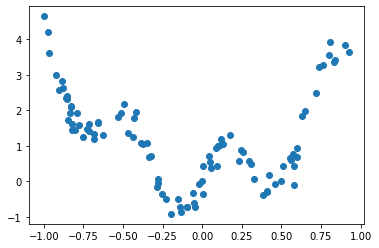

In [2]:
m = 100
x = -1 + 2*np.random.rand(m)
y = np.sin(10*x) + (2*x)**2 + 0.25*np.random.randn(m)
x=x
plt.scatter(x,y)

In [3]:
# cast x as a column vector
x = x.reshape(-1,1)

In [4]:
# apply polynomial kernel to the matrix with dot products
d = 10
K = (1+x.dot(x.T))**d
# solve least squares problem
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

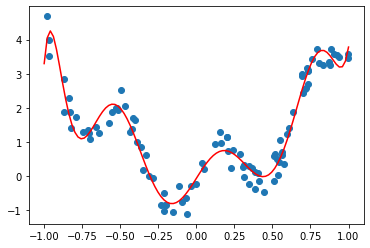

In [5]:
# plot results
m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(-1,1)
K_plot = (1+x_plot.dot(x.T))**d
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')

## Gaussian Kernel

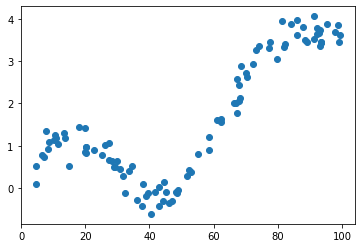

In [199]:
m = 100
x = 100*np.random.rand(m)
y = np.sin(x/10) + (x/50)**2 + 0.25*np.random.randn(m)
x=x
plt.scatter(x,y)

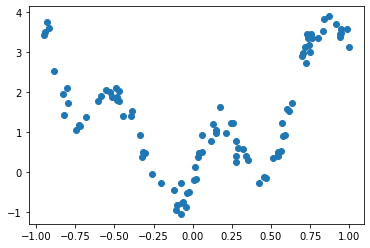

In [6]:
m = 100
x = -1 + 2*np.random.rand(m)
y = np.sin(10*x) + (2*x)**2 + 0.25*np.random.randn(m)
x=x
plt.scatter(x,y)

In [13]:
# distance matrix
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(x.reshape(m,1))

In [24]:
gamma = 1
K = np.exp(-gamma*dist**2)
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

(-1.0, 5.0)

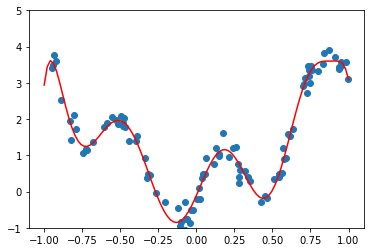

In [25]:
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
dist_plot = pairwise_distances(x_plot.reshape(m_plot,1),x.reshape(m,1))
K_plot = np.exp(-gamma*dist_plot**2)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-1,5])

## More examples

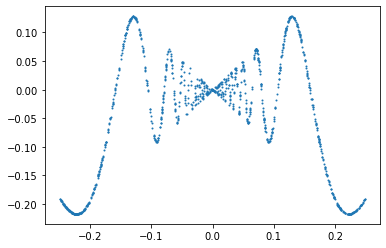

In [39]:
m = 1000
x = -0.25 + 0.5 * np.random.rand(m)
y = x*np.sin(1/x)
plt.scatter(x,y,s=1)

(-0.3, 0.15)

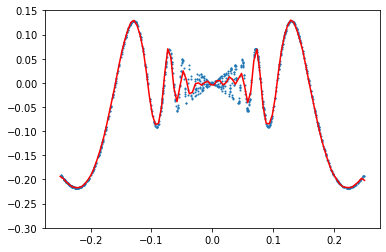

In [41]:
x = x.reshape(-1,1)
dist = pairwise_distances(x.reshape(m,1))
# kernel
gamma = 1000
K = np.exp(-gamma*dist**2)
# least squares problem
alpha = np.linalg.lstsq(K,y,rcond=None)[0]
# plot fitted model
m_plot = 100
x_plot = np.linspace(-0.25,0.25,m_plot)
dist_plot = pairwise_distances(x_plot.reshape(m_plot,1),x.reshape(m,1))
K_plot = np.exp(-gamma*dist_plot**2)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=1)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-.3,.15])

(-6.0, 6.0)

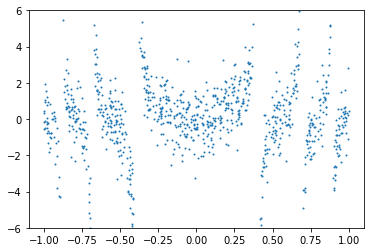

In [93]:
m = 1000
x = -1 + 2 * np.random.rand(m)
y = np.tan(10*x**2)+np.random.randn(m)
plt.scatter(x,y,s=1)

plt.ylim([-6,6])

(-6.0, 6.0)

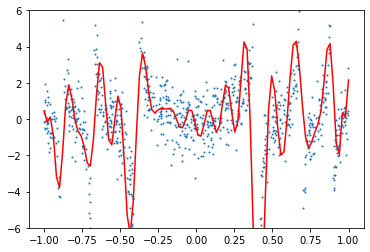

In [102]:
x = x.reshape(-1,1)
dist = pairwise_distances(x.reshape(m,1))
# kernel
gamma = 25
K = np.exp(-gamma*dist**2)
# least squares problem
alpha = np.linalg.lstsq(K,y,rcond=None)[0]
# plot fitted model
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
dist_plot = pairwise_distances(x_plot.reshape(m_plot,1),x.reshape(m,1))
K_plot = np.exp(-gamma*dist_plot**2)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=1)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-6,6])

(-6.0, 6.0)

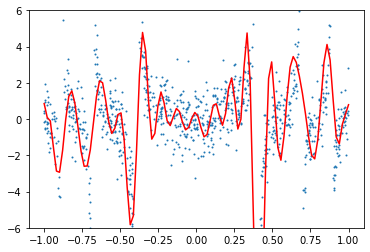

In [98]:
# sigmoid kernel
X = x.dot(x.T)
gamma = 5
r = 1
K = np.tanh(gamma*X+r)
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(-1,1)
K_plot = np.tanh(gamma*x_plot.dot(x.T)+r)
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=1)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-6,6])

(-6.0, 6.0)

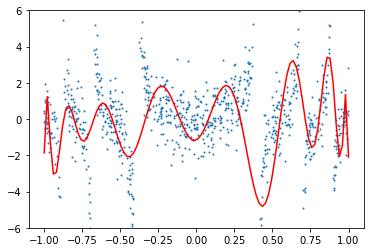

In [100]:
# polynomial kernel
d = 30
K = (1+x.dot(x.T))**d
# solve least squares problem
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

# plot results
m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(-1,1)
K_plot = (1+x_plot.dot(x.T))**d
y_plot = K_plot.dot(alpha)

plt.scatter(x,y,s=1)
plt.plot(x_plot,y_plot,'r')
plt.ylim([-6,6])